# Exploratory data analysis

>More detailed data description, explaining exactly what each column means:<br>
<br>
num_passengers = number of passengers travelling<br>
sales_channel = sales channel booking was made on<br>
trip_type = trip Type (Round Trip, One Way, Circle Trip)<br>
purchase_lead = number of days between travel date and booking date<br>
length_of_stay = number of days spent at destination<br>
flight_hour = hour of flight departure<br>
flight_day = day of week of flight departure<br>
route = origin -> destination flight route<br>
booking_origin = country from where booking was made<br>
wants_extra_baggage = if the customer wanted extra baggage in the booking<br>
wants_preferred_seat = if the customer wanted a preferred seat in the booking<br>
wants_in_flight_meals = if the customer wanted in-flight meals in the booking<br>
flight_duration = total duration of flight (in hours)<br>
booking_complete = flag indicating if the customer completed the booking<br>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.value_counts("trip_type")

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
dtype: int64

In [9]:
#Getting dummies for columns "trip type" and "sales_channel"
df[["trip_type_circle", "trip_type_oneway", "trip_type_roundtrip"]] = pd.get_dummies(df["trip_type"])
df[["internet_sale", "mobile_sale"]] = pd.get_dummies(df["sales_channel"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
 14  trip_type_circle       50000 non-null  uint8  
 15  tr

In [11]:
features = ["num_passengers", "purchase_lead", "length_of_stay", "flight_hour", "flight_day", "wants_extra_baggage",
           "wants_preferred_seat", "wants_in_flight_meals", "flight_duration", "trip_type_circle", "trip_type_oneway", 
           "trip_type_roundtrip", "internet_sale", "mobile_sale"]
target = "booking_complete"

# Feature Importance

[6.20682713e-02 2.78316016e-01 2.16492096e-01 1.92880881e-01
 1.00883200e-01 7.13302710e-03 6.54398514e-03 1.01543716e-02
 1.21189696e-01 2.48265451e-04 4.45364858e-04 6.77334966e-04
 1.40208451e-03 1.56540564e-03]


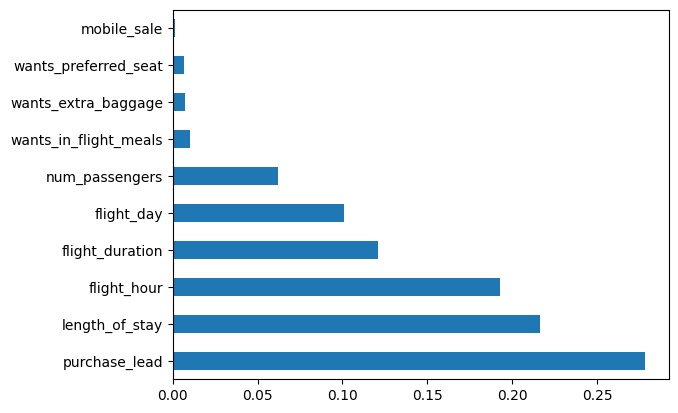

In [12]:
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = df[features]
y = df[target]

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Univariate Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                    Specs        Score
2          length_of_stay  4480.964772
1           purchase_lead  2358.678338
8         flight_duration   173.831731
6    wants_preferred_seat    88.288090
5     wants_extra_baggage    76.890347
13            mobile_sale    74.823889
10       trip_type_oneway    29.150326
7   wants_in_flight_meals    20.130962
0          num_passengers    19.018876
9        trip_type_circle    10.335789


# Correlation Matrix with Heatmap

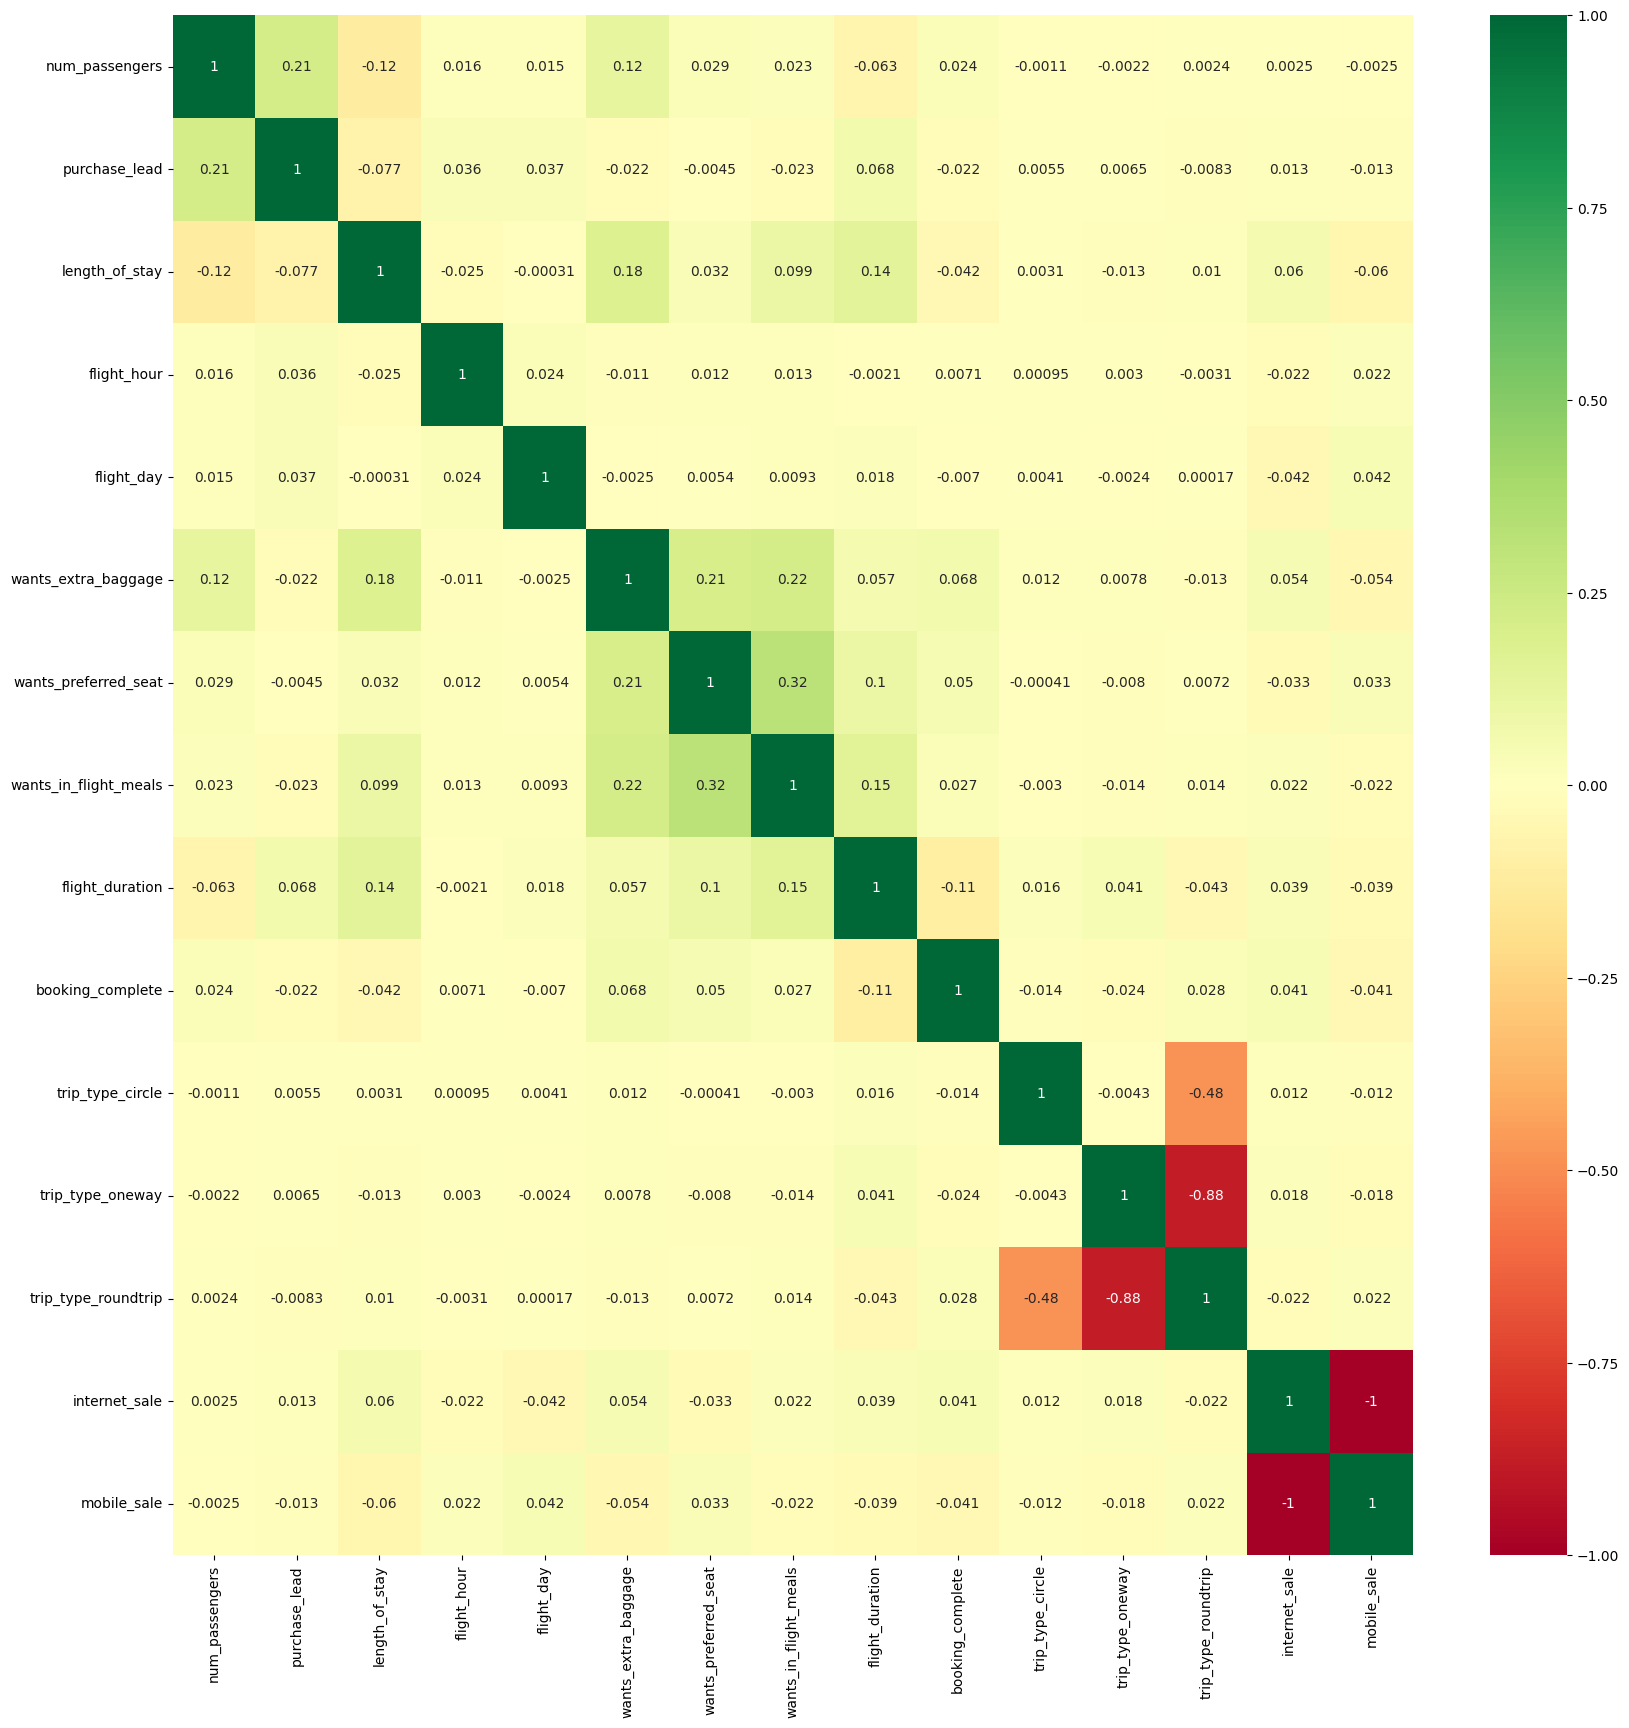

In [14]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [15]:
#Features selected using ExtraTreesClassifier, top 6 features
features_set_1 = ["purchase_lead", "length_of_stay", "flight_hour", "flight_duration", "flight_day", "num_passengers"]

#Features selected using ExtraTreesClassifier, top 9 features
features_set_2 = ["purchase_lead", "length_of_stay", "flight_hour", "flight_duration", 
                  "flight_day", "num_passengers", "wants_in_flight_meals", "wants_extra_baggage", "wants_preferred_seat"]

#Features selected according to Univariate Selection
features_set_3 = ["length_of_stay", "purchase_lead", "flight_duration", "wants_preferred_seat", "wants_extra_baggage", 
                 "mobile_sale"]


# Random forest model using features_set_1

In [16]:
# Putting feature variable to X
X_s1 = df[features_set_1]
# Putting target variable to y
y_s1 = df[target]

In [17]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test
X_train_s1, X_test_s1, y_train_s1, y_test_s1 = train_test_split(X_s1, y_s1, train_size=0.8, random_state=42)
X_train_s1.shape, X_test_s1.shape

((40000, 6), (10000, 6))

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf_s1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf_s1.fit(X_train_s1, y_train_s1)

# checking the oob score
classifier_rf_s1.oob_score_

0.85005

# Random forest model using features_set_2

In [19]:
# Putting feature variable to X
X_s2 = df[features_set_2]
# Putting target variable to y
y_s2 = df[target]

In [20]:
# Splitting the data into train and test
X_train_s2, X_test_s2, y_train_s2, y_test_s2 = train_test_split(X_s2, y_s2, train_size=0.8, random_state=42)
X_train_s2.shape, X_test_s2.shape

((40000, 9), (10000, 9))

In [21]:
classifier_rf_s2 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf_s2.fit(X_train_s2, y_train_s2)

# checking the oob score
classifier_rf_s2.oob_score_

0.85005

# Random forest model using features_set_3

In [22]:
# Putting feature variable to X
X_s3 = df[features_set_3]
# Putting target variable to y
y_s3 = df[target]

In [23]:
# Splitting the data into train and test
X_train_s3, X_test_s3, y_train_s3, y_test_s3 = train_test_split(X_s3, y_s3, train_size=0.8, random_state=42)
X_train_s3.shape, X_test_s3.shape

((40000, 6), (10000, 6))

In [24]:
classifier_rf_s3 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf_s3.fit(X_train_s3, y_train_s3)

# checking the oob score
classifier_rf_s3.oob_score_

0.85005

# hyperparameter tuning for Random Forest using GridSearchCV 

In [25]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train_s1, y_train_s1)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [26]:
grid_search.best_score_

0.85015

In [27]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=10, n_estimators=200,
                       n_jobs=-1, random_state=42)

# Autogluon model

In [20]:
from autogluon.tabular import TabularPredictor

train_data = df[["purchase_lead", "length_of_stay", "flight_hour", "flight_duration",
                "flight_day", "num_passengers", "booking_complete"]]

predictor = TabularPredictor(label="booking_complete", 
                             eval_metric="accuracy").fit(train_data=train_data, 
                                                        time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20230221_105820/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230221_105820/"
AutoGluon Version:  0.5.2
Python Version:     3.9.7
Operating System:   Darwin
Train Data Rows:    50000
Train Data Columns: 6
Label Column: booking_complete
Preprocessing data ...
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  [0, 1]
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...


Detailed Traceback:
Traceback (most recent call last):
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1126, in _train_and_save
    model = self._train_single(X, y, model, X_val, y_val, **model_fit_kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/trainer/abstract_trainer.py", line 1083, in _train_single
    model = model.fit(X=X, y=y, X_val=X_val, y_val=y_val, **model_fit_kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/abstract/abstract_model.py", line 587, in fit
    out = self._fit(**kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/ensemble/stacker_ensemble_model.py", line 154, in _fit
    return super()._fit(X=X, y=y, time_limit=time_limit, **kwargs)
  File "/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/models/ensembl

In [21]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2    0.85284       5.807937  247.207593                0.062170           9.332063            2       True         10
1   NeuralNetFastAI_BAG_L1    0.85050       0.564889  229.904202                0.564889         229.904202            1       True          8
2          CatBoost_BAG_L1    0.85044       0.014497    2.324778                0.014497           2.324778            1       True          5
3    NeuralNetTorch_BAG_L1    0.85044       0.335827  159.942804                0.335827         159.942804            1       True          9
4    ExtraTreesGini_BAG_L1    0.84418       1.616304    1.879588                1.616304           1.879588            1       True          6
5  RandomForestEntr_BAG_L1    0.84398       1.600761    2.049913                

/Users/wiktoriatwarog/Library/Python/3.9/lib/python/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'RandomForestGini_BAG_L1': 'StackerEnsembleModel_RF',
  'RandomForestEntr_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesGini_BAG_L1': 'StackerEnsembleModel_XT',
  'ExtraTreesEntr_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.83304,
  'KNeighborsDist_BAG_L1': 0.83232,
  'RandomForestGini_BAG_L1': 0.84364,
  'RandomForestEntr_BAG_L1': 0.84398,
  'CatBoost_BAG_L1': 0.85044,
  'ExtraTreesGini_BAG_L1': 0.84418,
  'ExtraTreesEntr_BAG_L1': 0.84364,
  'NeuralNetFastAI_BAG_L1': 0.8505,
  'NeuralNetTorch_BAG_L1': 0.85044,
  'WeightedEnsemble_L2': 0.85284},
 'model_best': 'WeightedEnsembl

<AxesSubplot: xlabel='model'>

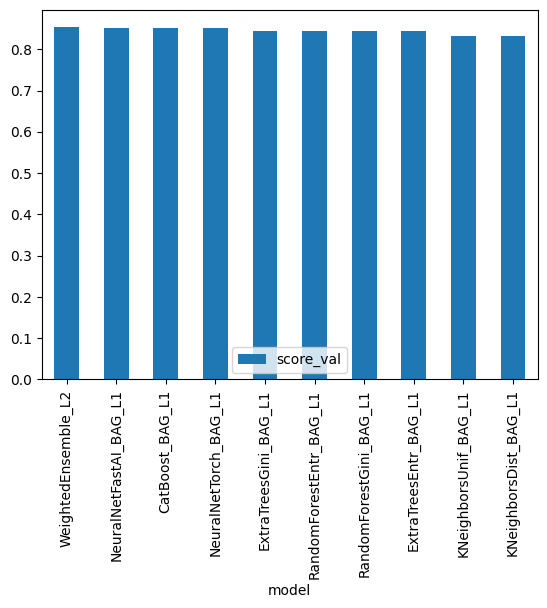

In [22]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")